<a href="https://colab.research.google.com/github/Rahul-Chouhan-407/Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction_by_Rahul_Chouhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Description
---
Rossmann operates over 3,000 drug Stores in 7 European countries. Currently, Rossmann Store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann Stores. The task is to forecast the "Sales" column for the test set. Note that some Stores in the dataset were temporarily closed for refurbishment.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# To show all the rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Rossmann = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Capstone Project 2 - Retail Sales Prediction/Rossmann Stores Data.csv")
Store = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Capstone Project 2 - Retail Sales Prediction/Store.csv")

In [5]:
Rossmann.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
Store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
Rossmann['Open'].value_counts().iloc[:5]

1    844392
0    172817
Name: Open, dtype: int64

In [7]:
Rossmann.shape

(1017209, 9)

In [9]:
Rossmann = Rossmann[Rossmann['Sales'] != 0]
Rossmann = Rossmann[Rossmann['Open'] != 0 ]

In [10]:
# Getting the value counts
Rossmann['Open'].value_counts()

1    844338
Name: Open, dtype: int64

In [11]:
#Dropping the open column
Rossmann.drop(['Open'], axis = 1, inplace = True)

In [12]:
#Finding the shape
Rossmann.shape

(844338, 8)

In [13]:
# Getting first 5 rows
Rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [14]:
Rossmann.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
Rossmann.duplicated().sum()

0

In [16]:
# Getting the info of rossmann
Rossmann.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844338 non-null  int64 
 1   DayOfWeek      844338 non-null  int64 
 2   Date           844338 non-null  object
 3   Sales          844338 non-null  int64 
 4   Customers      844338 non-null  int64 
 5   Promo          844338 non-null  int64 
 6   StateHoliday   844338 non-null  object
 7   SchoolHoliday  844338 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


In [17]:
Rossmann['Date'] = pd.to_datetime(Rossmann['Date'])

In [18]:
Rossmann['Year'] = Rossmann['Date'].dt.year
Rossmann['Month'] = Rossmann['Date'].dt.month
Rossmann['Day'] = Rossmann['Date'].dt.day

#Removing weekday bocause we alreaday have one column dayofweek which is the same thing
#rossmann['Weekday'] = rossmann['Date'].dt.weekday

#renaming the dayofweek column to weekday
Rossmann = Rossmann.rename(columns={'DayOfWeek': 'Weekday'})

Rossmann.drop(['Date'], axis = 1, inplace = True)

In [19]:
def weekend(val):
    if val == 6:
        return 1
    elif val == 7:
        return 1
    else:
        return 0

In [21]:
Rossmann['Weekend'] = Rossmann['Weekday'].apply(weekend)

In [22]:
# Getting random sample 
Rossmann.sample(10)

,Store,Weekday,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekend
80854,575,3,5925,478,1,0,0,2015,5,20,0
565396,877,1,6093,889,0,0,0,2014,2,10,0
392485,1069,5,4911,658,1,0,0,2014,7,18,0
401476,643,2,6172,871,0,0,0,2014,7,8,0
200485,901,1,9533,805,1,0,0,2015,2,2,0
313463,491,5,7810,572,1,0,0,2014,10,10,0
852835,646,2,5696,741,1,0,1,2013,5,28,0
798868,199,1,10966,760,1,0,1,2013,7,15,0
498436,817,5,20461,3001,0,0,0,2014,4,11,0
342059,28,2,8668,938,0,0,0,2014,9,9,0


In [23]:
Rossmann['Weekday'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [24]:
# Getting info of the data
Rossmann.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844338 non-null  int64 
 1   Weekday        844338 non-null  int64 
 2   Sales          844338 non-null  int64 
 3   Customers      844338 non-null  int64 
 4   Promo          844338 non-null  int64 
 5   StateHoliday   844338 non-null  object
 6   SchoolHoliday  844338 non-null  int64 
 7   Year           844338 non-null  int64 
 8   Month          844338 non-null  int64 
 9   Day            844338 non-null  int64 
 10  Weekend        844338 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 77.3+ MB


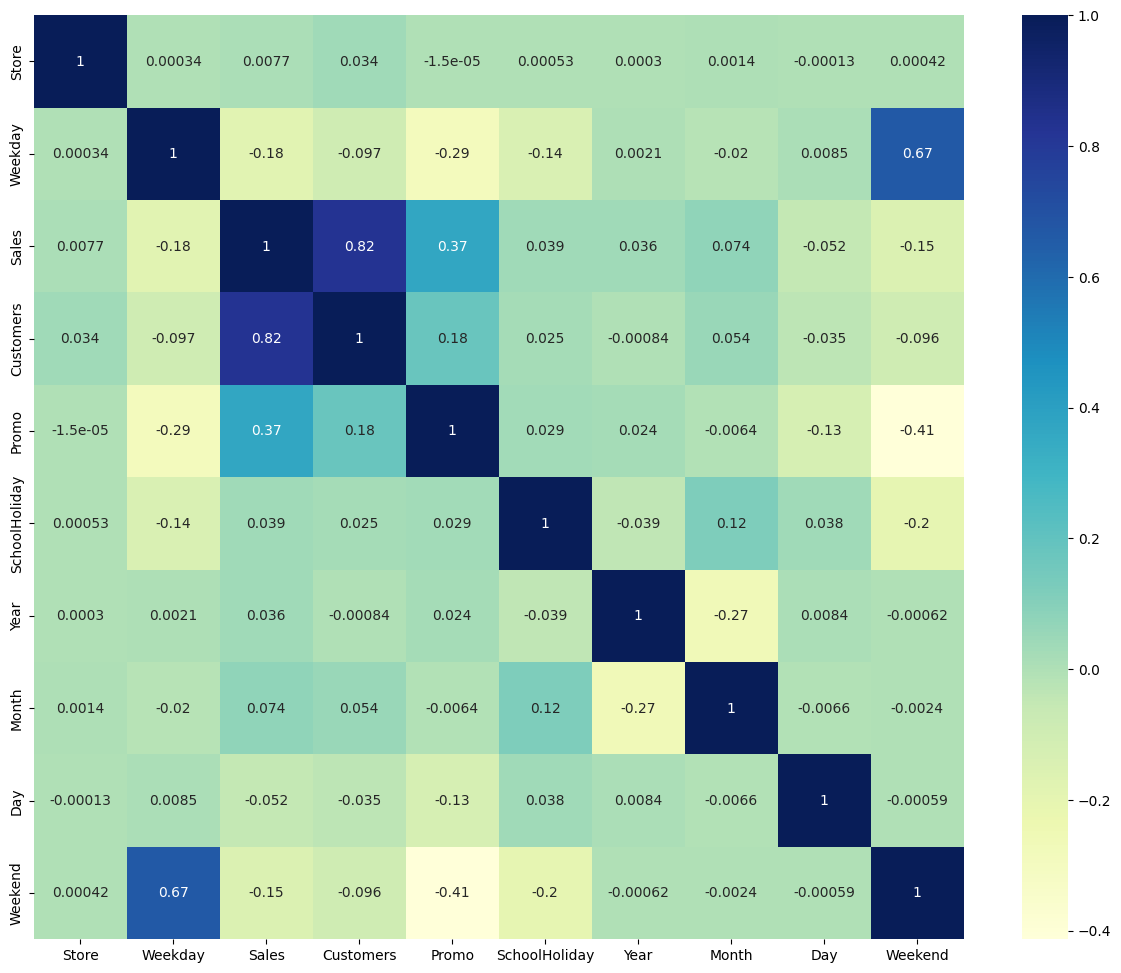

In [25]:
plt.figure(figsize = (15,12))
sns.heatmap(Rossmann.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [27]:
#Getting the first 5 rows
Store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [36]:
# Getting the sum of null values
Store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [37]:
# Replacing the NAN values with median
Store['CompetitionDistance'].fillna(Store['CompetitionDistance'].median(), inplace = True)

# Replacing NAN values with 0 in CompetitionOpenSinceMonth
Store['CompetitionOpenSinceMonth'] = Store['CompetitionOpenSinceMonth'].fillna(0)

# Replacing NAN values with 0 in CompetitionOpenSinceYear
Store['CompetitionOpenSinceYear'] = Store['CompetitionOpenSinceYear'].fillna(0)

# Replacing NAN values with 0 in Promo2SinceWeek
Store['Promo2SinceWeek'] = Store['Promo2SinceWeek'].fillna(0)

# Replacing NAN values with 0 in Promo2SinceYear
Store['Promo2SinceYear'] = Store['Promo2SinceYear'].fillna(0)

# Replacing NAN values with 0 in PromoInterval
Store['PromoInterval'].fillna(Store['PromoInterval'].mode().values[0], inplace = True)

In [38]:
Store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [39]:
Store.duplicated().sum()

0

In [40]:
# Getting the info
Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [41]:
Store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"


In [42]:
# Changing the datatype of CompetitionDistance from float to int
Store['CompetitionDistance'] = Store['CompetitionDistance'].astype(int)

# Changing the datatype of CompetitionOpenSinceMonth from float to int
Store['CompetitionOpenSinceMonth'] = Store['CompetitionOpenSinceMonth'].astype(int)

# Changing the datatype of Promo2SinceWeek from float to int
Store['Promo2SinceWeek'] = Store['Promo2SinceWeek'].astype(int)

# Changing the datatype of CompetitionOpenSinceYear from float to int
Store['CompetitionOpenSinceYear'] = Store['CompetitionOpenSinceYear'].astype(int)

# Changing the datatype of Promo2SinceYear from float to int
Store['Promo2SinceYear'] = Store['Promo2SinceYear'].astype(int)

In [43]:
Store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,0,0,"Jan,Apr,Jul,Oct"
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,0,0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910,4,2015,0,0,0,"Jan,Apr,Jul,Oct"


In [44]:
Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Store                      1115 non-null   int64 
 1   StoreType                  1115 non-null   object
 2   Assortment                 1115 non-null   object
 3   CompetitionDistance        1115 non-null   int64 
 4   CompetitionOpenSinceMonth  1115 non-null   int64 
 5   CompetitionOpenSinceYear   1115 non-null   int64 
 6   Promo2                     1115 non-null   int64 
 7   Promo2SinceWeek            1115 non-null   int64 
 8   Promo2SinceYear            1115 non-null   int64 
 9   PromoInterval              1115 non-null   object
dtypes: int64(7), object(3)
memory usage: 87.2+ KB
